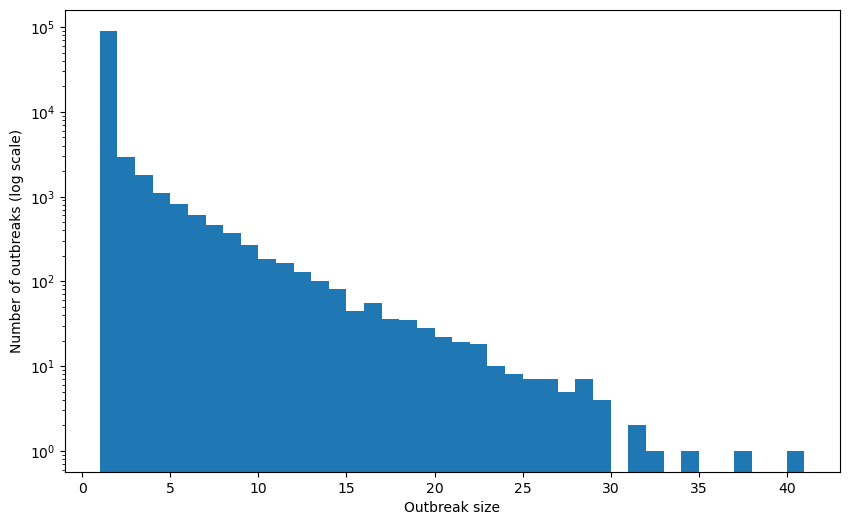

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

def branching(R0, k, G=200):
    mean = R0
    variance = mean + (mean**2) / k
    p = mean / variance
    n = mean**2 / (variance - mean)

    ninfected = 1 
    maxinf = 1 

    for j in range(G):
        offspring = nbinom.rvs(n=n, p=p, size=ninfected)
        ninfected = np.sum(offspring)
        if ninfected >= maxinf:
            maxinf= ninfected
        if ninfected == 0:
            break
        if ninfected >= 200:
            break
    return maxinf
    
R0 = 3
finite_sizes = []
target_finite = 100000
k=0.1

while len(finite_sizes) < target_finite:
    size = branching(R0, k, G=200)
    if size < 200:
        finite_sizes.append(size)

plt.figure(figsize=(10, 6))
plt.hist(finite_sizes, bins=40, density=False, log=True)
plt.xlabel("Outbreak size")
plt.ylabel("Number of outbreaks (log scale)")
plt.show()

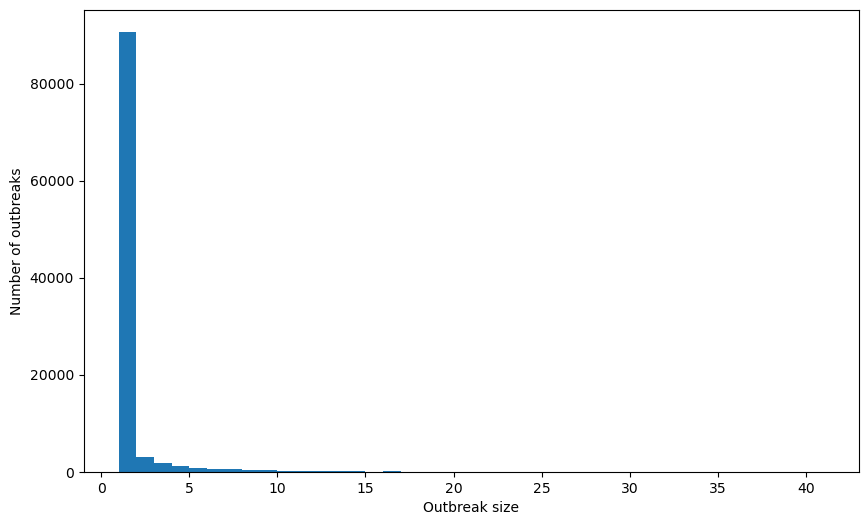

In [3]:
plt.figure(figsize=(10, 6))
plt.hist(finite_sizes, bins=40, density=False)
plt.xlabel("Outbreak size")
plt.ylabel("Number of outbreaks")
plt.show()